<a href="https://colab.research.google.com/github/hmankodiya/Aces-Session/blob/master/SessionAces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Simple Linear Regression

In [ ]:
X = np.linspace(0,1,100)
y = 5*X+2

In [ ]:
X,y

In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
def make_weights(m,n):
    return np.random.rand(n,1)

In [ ]:
def predict(X,theta,b):
    return np.dot(X,theta) + b

In [ ]:
def loss(X,y,m,theta,b):
    yi = predict(X,theta,b)
    return np.sum(np.square(yi-y))/(2*m)

In [ ]:
def update_weights(X,y,m,theta,b,alpha=0.01):
    pred = predict(X,theta,b)
    theta = theta - alpha*np.sum((pred-y)*X)/m
    b = b -  alpha*np.sum(pred - y)/m
    return theta,b

In [ ]:
def train(X,y,alpha=0.001,itr=100,step_size=10):
    
    loss_log = []
    itr_arr = []
    
    m = X.shape[0]
    n = X.shape[1]
    
    np.random.seed(42)
    theta = make_weights(m,n)
    b = np.random.rand(1)
    fig,ax = plt.subplots(figsize=(10,10))
    
    pred = predict(X,theta,b)
    plt.plot(X,pred,label=f'random weights')
    plt.legend()    
    
    for _ in range(itr+1):
        theta,b = update_weights(X,y,m,theta,b,alpha=alpha)
        if not _%step_size and _!=0 :
#             print(f'loss at {_} = {loss(X,y,m,theta,b)}')
            loss_log.append(loss(X,y,m,theta,b))

            pred = predict(X,theta,b)
            plt.plot(X,pred,label=f'itr {_}')
            plt.legend()    
    print(_)
    plt.scatter(X,y)
    plt.show()
    return theta,b,loss_log

50000


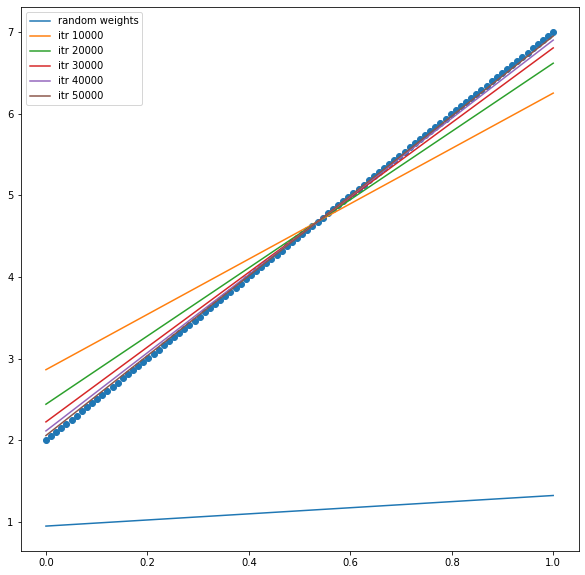

In [ ]:
theta,b,_ = train(X,y,itr=50000,step_size=10000);

In [ ]:
theta,b

(array([[4.88955143]]), array([2.05919317]))

# Using Tensorflow

# Calculating Gradients

In [ ]:
@tf.function
def fun(x):
    return x**2
x = tf.Variable([1.,2.,3.,4.,5.])
with tf.GradientTape() as tape:
    func = fun(x)
grads = tape.gradient(func,x)
grads

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 2.,  4.,  6.,  8., 10.], dtype=float32)>

In [ ]:
X = tf.reshape(tf.linspace(0.0,1.0,100),[1,-1])
y = 5*X+2
w = tf.Variable(tf.random.normal([1,1],dtype='float32')) 
b = tf.Variable(tf.random.normal([1,1],dtype='float32'))
wghts = []

print(f'weights {w.numpy()[0,0]}, bias {b.numpy()[0,0]}')
EPOCHS = 10000
STEPS = 1000
for i in range(1,EPOCHS+1):
  with tf.GradientTape() as tape:
    # loss = tf.reduce_mean()
    y_hat = w @ X + b
    loss = tf.reduce_mean((y-y_hat)**2)
  grads = tape.gradient(loss,[w,b])
  w.assign_sub(0.01*grads[0].numpy())
  b.assign_sub(0.01*grads[1].numpy())
  if i%STEPS==0:
    wghts.append([w.numpy()[0,0],b.numpy()[0,0]])
print(f'weights {w.numpy()[0,0]}, bias {b.numpy()[0,0]}')

weights 0.5346615314483643, bias -0.4856344163417816
weights 4.9998250007629395, bias 2.000093460083008


In [ ]:
X.numpy().shape,y_hat.numpy().shape

((1, 100), (1, 100))

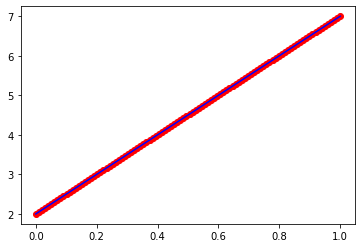

In [ ]:
plt.scatter(X.numpy(),y.numpy(),color='red')
plt.plot(X.numpy()[0,:],y_hat.numpy()[0,:],color='blue')
plt.show()

# Binary Classification

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data = load_iris()

In [ ]:
X,y = data['data'],data['target']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

In [ ]:
dt.predict(X[:10]),y[:10]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
dt.score(X,y)

1.0